# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 443


In [3]:
# Print the list of cities
print(cities)

['longyearbyen', 'dunedin', 'olonkinbyen', 'hamilton', 'gadzhiyevo', 'whitehorse', 'grytviken', 'nahiyat ash shinafiyah', 'rifle', 'pama', 'colonia', 'papatowai', 'albany', 'adamstown', 'edinburgh of the seven seas', 'kristiansund', 'chibougamau', 'port-aux-francais', 'waitangi', 'puerto natales', 'verdal', 'port mathurin', 'brak', 'talnakh', 'port lincoln', 'mount gambier', 'bethel', 'lihue', 'jamestown', 'ronne', 'vila velha', 'weno', 'hawaiian paradise park', 'fort st. john', 'ndjole', 'petropavlovsk-kamchatsky', 'yellowknife', 'alice springs', 'badger', 'aras-asan', 'port elizabeth', 'nema', 'abong mbang', 'la passe', 'uturoa', 'georgetown', 'margate', 'tazovsky', 'invercargill', "parabel'", 'mhangura', 'arraial do cabo', 'lubang', 'wailua homesteads', 'west island', 'machico', 'luena', 'tevragh zeina', 'isafjordur', 'saipan', 'kodiak', 'natal', 'union choco', 'paragominas', 'delijan', 'ylitornio', 'iqaluit', 'hermanus', 'zagora', 'preobrazheniye', 'bilibino', 'leh', 'quellon', 'st

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(25)

    # Create endpoint URL with each city
#     city_url = url + "q=" + city + "&appid=" + weather_api_key
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        city_weather = requests.get(city_url).json()


        #Given datetime value
        timestamp = city_weather['dt']

        #convert the timestamp to a tuple of struct_time
        time_tuple = time.gmtime(timestamp)
    
        # format the time to a string in the desired format
        formatted_date = time.strftime('%Y/%m/%d', time_tuple)


        # Kelvin to Fahrenheit coversion
        # Equation: Fahrenheit = (Kelvin - 273.15)*9/5 +  32
        city_temp_f = (city_weather['main']['temp_max'] - 273.15) * 9/5 + 32
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_temp_f
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = formatted_date

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | dunedin
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | gadzhiyevo
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | nahiyat ash shinafiyah
Processing Record 9 of Set 1 | rifle
Processing Record 10 of Set 1 | pama
Processing Record 11 of Set 1 | colonia
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | kristiansund
Processing Record 17 of Set 1 | chibougamau
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | verdal
Processing Record 22 of Set 1 | 

In [5]:
print(city_data)

[{'City': 'longyearbyen', 'Lat': 78.2186, 'Lng': 15.6401, 'Max Temp': 26.438000000000045, 'Humidity': 74, 'Cloudiness': 75, 'Wind Speed': 5.14, 'Country': 'SJ', 'Date': '2023/11/09'}, {'City': 'dunedin', 'Lat': -45.8742, 'Lng': 170.5036, 'Max Temp': 46.22000000000006, 'Humidity': 62, 'Cloudiness': 99, 'Wind Speed': 1.42, 'Country': 'NZ', 'Date': '2023/11/09'}, {'City': 'olonkinbyen', 'Lat': 70.9221, 'Lng': -8.7187, 'Max Temp': 27.698000000000025, 'Humidity': 67, 'Cloudiness': 92, 'Wind Speed': 1.11, 'Country': 'SJ', 'Date': '2023/11/09'}, {'City': 'hamilton', 'Lat': 39.1834, 'Lng': -84.5333, 'Max Temp': 63.248000000000026, 'Humidity': 46, 'Cloudiness': 0, 'Wind Speed': 6.17, 'Country': 'US', 'Date': '2023/11/09'}, {'City': 'gadzhiyevo', 'Lat': 69.2551, 'Lng': 33.3362, 'Max Temp': 20.82200000000004, 'Humidity': 92, 'Cloudiness': 90, 'Wind Speed': 5.63, 'Country': 'RU', 'Date': '2023/11/09'}, {'City': 'whitehorse', 'Lat': 60.7161, 'Lng': -135.0538, 'Max Temp': 39.30800000000001, 'Humidit

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          427
Lat           427
Lng           427
Max Temp      427
Humidity      427
Cloudiness    427
Wind Speed    427
Country       427
Date          427
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,26.438,74,75,5.14,SJ,2023/11/09
1,dunedin,-45.8742,170.5036,46.220,62,99,1.42,NZ,2023/11/09
2,olonkinbyen,70.9221,-8.7187,27.698,67,92,1.11,SJ,2023/11/09
3,hamilton,39.1834,-84.5333,63.248,46,0,6.17,US,2023/11/09
4,gadzhiyevo,69.2551,33.3362,20.822,92,90,5.63,RU,2023/11/09


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,26.438,74,75,5.14,SJ,2023/11/09
1,dunedin,-45.8742,170.5036,46.220,62,99,1.42,NZ,2023/11/09
2,olonkinbyen,70.9221,-8.7187,27.698,67,92,1.11,SJ,2023/11/09
3,hamilton,39.1834,-84.5333,63.248,46,0,6.17,US,2023/11/09
4,gadzhiyevo,69.2551,33.3362,20.822,92,90,5.63,RU,2023/11/09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

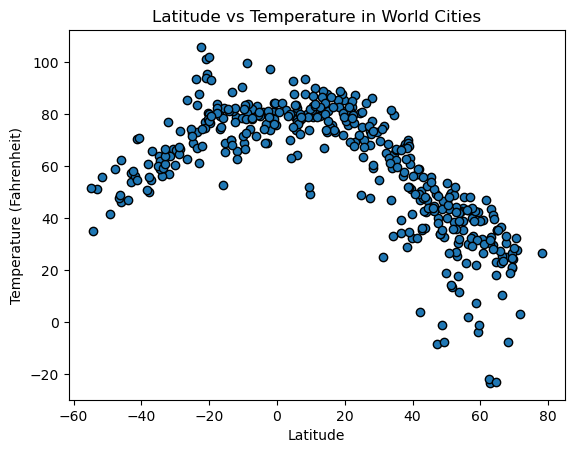

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors='black', linewidth=1)

# Incorporate the other graph properties
plt.title("Latitude vs Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

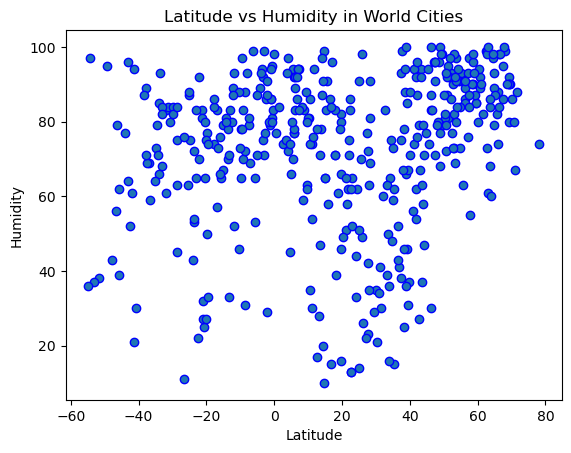

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors='blue', linewidth=1)

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

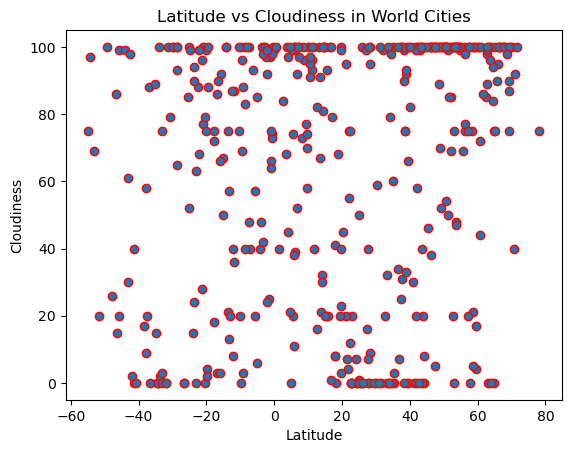

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="red", linewidth=1)

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

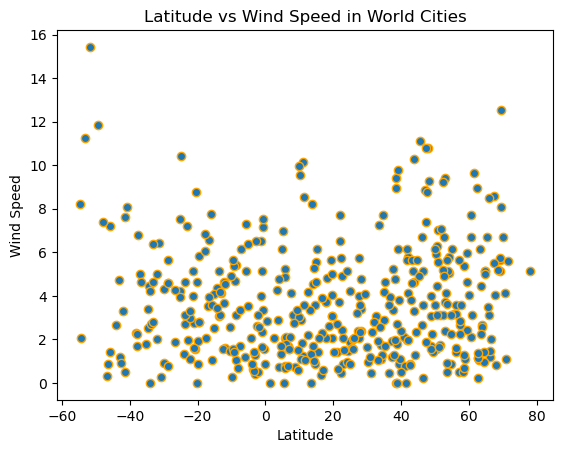

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='orange', linewidth=1)

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed in World Cities')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
from scipy import stats
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label):
    #perform linear regression
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    #Get regression values
    regress_values = x_values * slope + intercept
    
    #Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    #label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, (x_values.median(), y_values.median()), fontsize=15, color="red")
    
    #Show plot
    plt.show()
    return slope, intercept, r_value, p_value, std_err
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,26.438,74,75,5.14,SJ,2023/11/09
2,olonkinbyen,70.9221,-8.7187,27.698,67,92,1.11,SJ,2023/11/09
3,hamilton,39.1834,-84.5333,63.248,46,0,6.17,US,2023/11/09
4,gadzhiyevo,69.2551,33.3362,20.822,92,90,5.63,RU,2023/11/09
5,whitehorse,60.7161,-135.0538,39.308,92,72,6.71,CA,2023/11/09


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dunedin,-45.8742,170.5036,46.220,62,99,1.42,NZ,2023/11/09
6,grytviken,-54.2811,-36.5092,35.168,97,97,2.05,GS,2023/11/09
11,papatowai,-46.5619,169.4708,47.822,56,86,0.34,NZ,2023/11/09
13,adamstown,-25.0660,-130.1015,72.662,87,100,7.55,PN,2023/11/09
14,edinburgh of the seven seas,-37.0676,-12.3116,54.770,69,88,5.02,SH,2023/11/09


###  Temperature vs. Latitude Linear Regression Plot

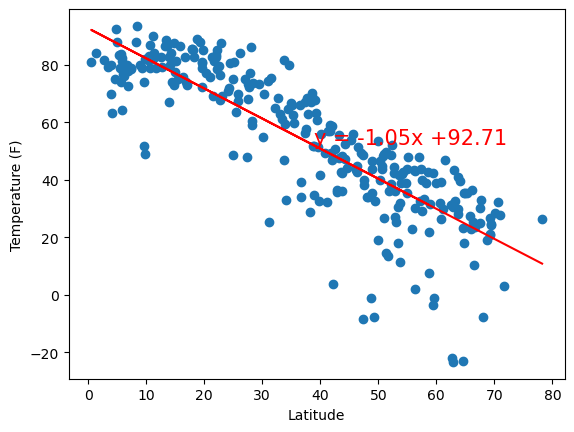

(-1.046447197666869,
 92.707698786344,
 -0.842497566451279,
 4.3959865987293e-79,
 0.03949615435773722)

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Temperature (F)'
linear_regression_plot(x_values,y_values,x_label,y_label)

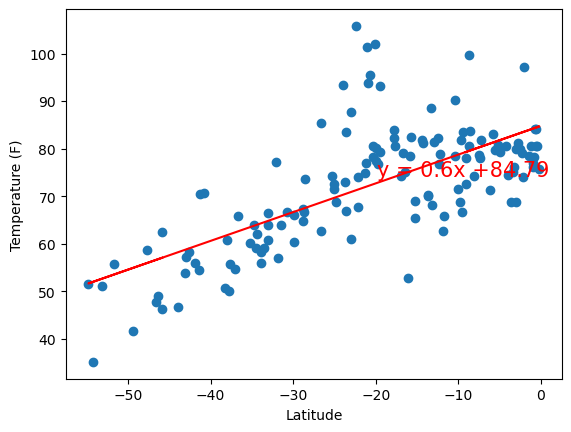

(0.6044063312444741,
 84.79095818594114,
 0.682290170225104,
 3.134779652355521e-20,
 0.05553364963603812)

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Temperature (F)'
linear_regression_plot(x_values,y_values,x_label,y_label)

**Discussion about the linear relationship:** The Temperature decreases as you move away from the equator; and Temperature increases as you move closer to the equator

### Humidity vs. Latitude Linear Regression Plot

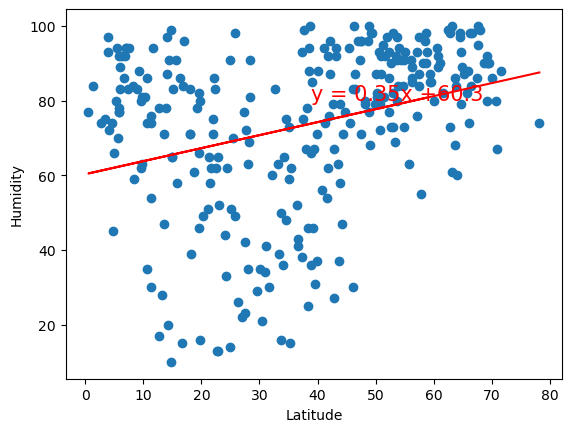

(0.3481664249205934,
 60.300618038831914,
 0.3132433460922204,
 5.3410542464011075e-08,
 0.062307184587374984)

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
linear_regression_plot(x_values,y_values,x_label,y_label)

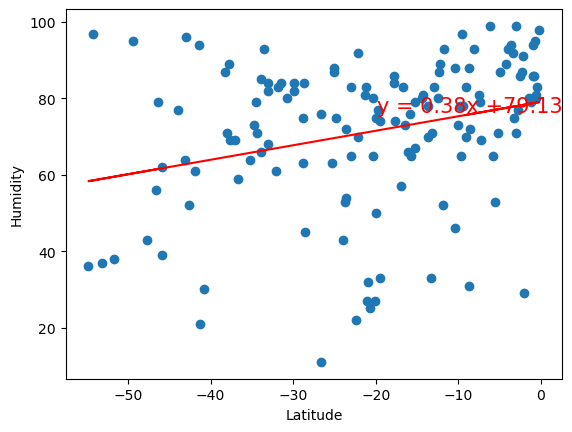

(0.3795470648683663,
 79.1316296914336,
 0.2799358873692063,
 0.0008831319463488345,
 0.11161364635334076)

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
linear_regression_plot(x_values,y_values,x_label,y_label)

Discussion about the linear relationship: In the two diagrams, the humidity tends to increase when you move away from the equator in the northern hemispher, but not consistent in the southern hemisphere. There could be other factors to consider too. Like proximity to water, air temparture and others. 

### Cloudiness vs. Latitude Linear Regression Plot

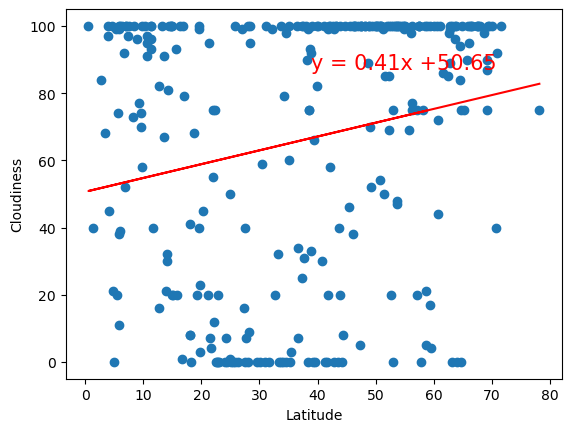

(0.41079539899093775,
 50.647468184632416,
 0.20889125134751127,
 0.00034984909282718057,
 0.11352096698291259)

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
linear_regression_plot(x_values,y_values,x_label,y_label)

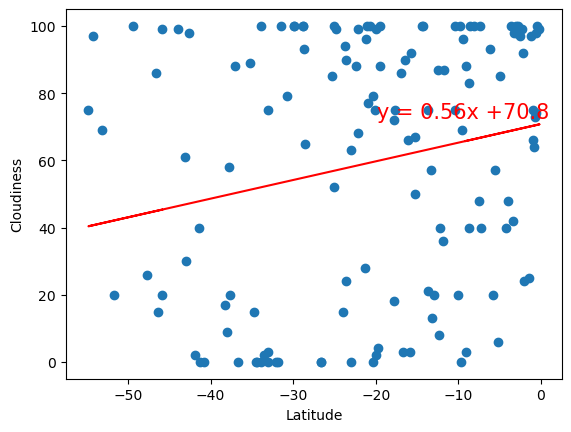

(0.5553091129225585,
 70.8038306324064,
 0.21296703057722177,
 0.012145815387630893,
 0.21846100736985885)

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
linear_regression_plot(x_values,y_values,x_label,y_label)

**Discussion about the linear relationship: Based on the statistical diagrams on Cloudiness vs Latitude, it shows that cloudiness is random on both hemispheres. It can be influenced by multiple factors like proximity to ocean, geograhical features like mountains, and others.

### Wind Speed vs. Latitude Linear Regression Plot

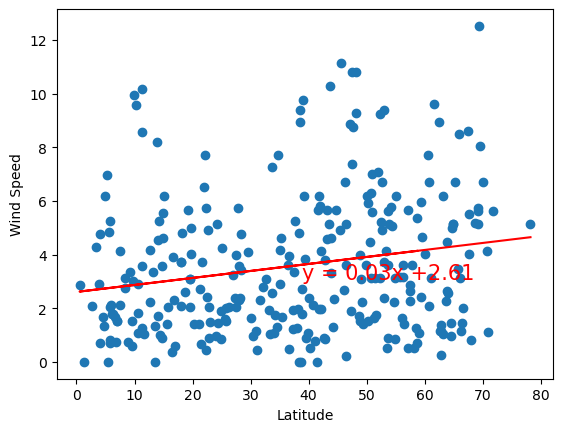

(0.026076887366971568,
 2.6077833520297204,
 0.20281806645610706,
 0.0005222286762224094,
 0.007431677583005081)

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
linear_regression_plot(x_values,y_values,x_label,y_label)

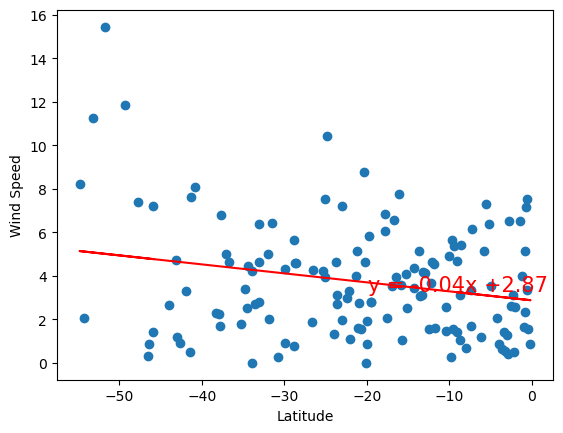

(-0.041324817127208785,
 2.8727960516321343,
 -0.22815105924740595,
 0.007115671642527476,
 0.015122063123099105)

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
linear_regression_plot(x_values,y_values,x_label,y_label)

**Discussion about the linear relationship:** For the Wind Speed vs Latitude, the Wind Speed decreases as you move away from the equator in the northern hemisphere, but also decreases as you get closer to the equator in the southern hemispher. It simply shows that wind speed has no linear effect with latitude. These could be due to factors such as pressure or seasonal variations, as different parts of the Earth receive varying amounts of solar energy as different times of the year, and probably other factors too.

*** END OF PARTS 1 and 2. Analysis is continued in VacationPY.ipynb *** 